# 0. Preparation

In [3]:
import spikeinterface as si
import spikeinterface.extractors as se 
import spikeinterface.preprocessing as spre
import spikeinterface.sorters as ss
import spikeinterface.postprocessing as spost
import spikeinterface.qualitymetrics as sqm
import spikeinterface.comparison as sc
import spikeinterface.exporters as sexp
import spikeinterface.widgets as sw

23:06:02 [I] klustakwik KlustaKwik2 version 0.2.6


In [2]:
#pip install numpy==1.22

In [5]:
print(f"SpikeInterface version: {si.__version__}")

SpikeInterface version: 0.95.1


In [6]:
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path

import spikeinterface_gui as sigui

import warnings
warnings.simplefilter("ignore")

%matplotlib widget

In [5]:
#pip uninstall pyEDFlib


In [7]:
import pyedflib

# 1. Load data and design probe

In [8]:
# file path
base_folder = Path('C:/Users/betty/Desktop/SpikeInterface/EDF')
recording_file = base_folder / 'Week2Day1_220822_155852_section1.edf'

recording_file

WindowsPath('C:/Users/betty/Desktop/SpikeInterface/EDF/Week2Day1_220822_155852_section1.edf')

In [9]:
recording=se.EDFRecordingExtractor(recording_file, stream_id=None, stream_name=None, all_annotations=False)


In [11]:
recording2 = recording.save(folder='C:/Users/betty/Desktop/SpikeInterface/EDF/SAVEDF0')

write_binary_recording with n_jobs = 1 and chunk_size = None


In [12]:
recording2

BinaryFolderRecording: 16 channels - 1 segments - 20.0kHz - 183.000s

In [13]:
recording2.annotate(is_filtered=False)

In [12]:
se.recording_extractor_full_dict

{'binary': spikeinterface.core.binaryrecordingextractor.BinaryRecordingExtractor,
 'numpy': spikeinterface.core.numpyextractors.NumpyRecording,
 'shybrid': spikeinterface.extractors.shybridextractors.SHYBRIDRecordingExtractor,
 'mda': spikeinterface.extractors.mdaextractors.MdaRecordingExtractor,
 'cbin_ibl': spikeinterface.extractors.cbin_ibl.CompressedBinaryIblExtractor,
 'mcsh5': spikeinterface.extractors.mcsh5extractors.MCSH5RecordingExtractor,
 'alphaomega': spikeinterface.extractors.neoextractors.alphaomega.AlphaOmegaRecordingExtractor,
 'axona': spikeinterface.extractors.neoextractors.axona.AxonaRecordingExtractor,
 'biocam': spikeinterface.extractors.neoextractors.biocam.BiocamRecordingExtractor,
 'blackrock': spikeinterface.extractors.neoextractors.blackrock.BlackrockRecordingExtractor,
 'ced': spikeinterface.extractors.neoextractors.ced.CedRecordingExtractor,
 'edf': spikeinterface.extractors.neoextractors.edf.EDFRecordingExtractor,
 'intan': spikeinterface.extractors.neoextr

In [14]:
channel_ids = recording2.get_channel_ids()
fs = recording2.get_sampling_frequency()
num_chan = recording2.get_num_channels()
num_segments = recording2.get_num_segments()

print(f'Channel ids: {channel_ids}')
print(f'Sampling frequency: {fs}')
print(f'Number of channels: {num_chan}')
print(f"Number of segments: {num_segments}")

Channel ids: ['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15']
Sampling frequency: 20000.0
Number of channels: 16
Number of segments: 1


In [15]:
trace_snippet = recording2.get_traces(start_frame=int(fs*0), end_frame=int(fs*2))
print('Traces shape:', trace_snippet.shape)

Traces shape: (40000, 16)


Traces dtype after scaling: float32


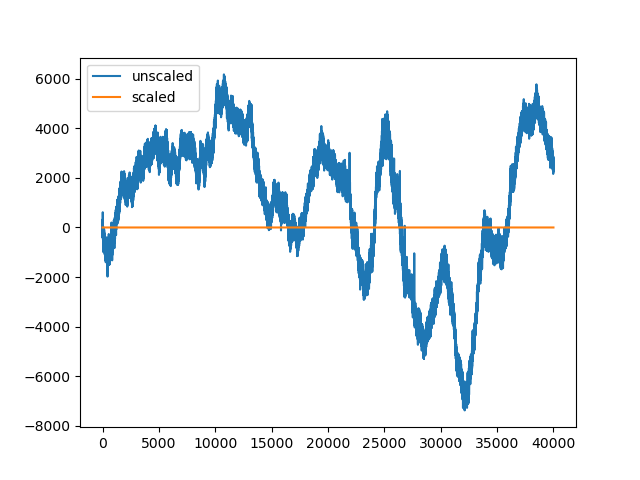

In [15]:
traces_unscaled = recording2.get_traces(return_scaled=False,start_frame=int(fs*4), end_frame=int(fs*6))
traces_scaled = recording2.get_traces(return_scaled=True,start_frame=int(fs*4), end_frame=int(fs*6))  # return_scaled is True by default

print(f"Traces dtype after scaling: {traces_scaled.dtype}")
fig, ax = plt.subplots()
plt.plot(traces_unscaled[:, 0], label="unscaled")
plt.plot(traces_scaled[:, 0], label="scaled")
plt.legend()

plt.show()

Load probe information, here we use self-designed probe.

In [15]:
import probeinterface as pi
from probeinterface import Probe
from probeinterface.plotting import plot_probe

In [16]:
n = 16
positions = np.zeros((n, 2))
for i in range(n):
    x = i // 16
    y = i % 16
    positions[i] = x, y
positions *= 100

In [17]:
positions

array([[   0.,    0.],
       [   0.,  100.],
       [   0.,  200.],
       [   0.,  300.],
       [   0.,  400.],
       [   0.,  500.],
       [   0.,  600.],
       [   0.,  700.],
       [   0.,  800.],
       [   0.,  900.],
       [   0., 1000.],
       [   0., 1100.],
       [   0., 1200.],
       [   0., 1300.],
       [   0., 1400.],
       [   0., 1500.]])

In [18]:
positions[:,1]+=118

positions

array([[   0.,  118.],
       [   0.,  218.],
       [   0.,  318.],
       [   0.,  418.],
       [   0.,  518.],
       [   0.,  618.],
       [   0.,  718.],
       [   0.,  818.],
       [   0.,  918.],
       [   0., 1018.],
       [   0., 1118.],
       [   0., 1218.],
       [   0., 1318.],
       [   0., 1418.],
       [   0., 1518.],
       [   0., 1618.]])

In [19]:
positions[:,0]+=-9
positions

array([[  -9.,  118.],
       [  -9.,  218.],
       [  -9.,  318.],
       [  -9.,  418.],
       [  -9.,  518.],
       [  -9.,  618.],
       [  -9.,  718.],
       [  -9.,  818.],
       [  -9.,  918.],
       [  -9., 1018.],
       [  -9., 1118.],
       [  -9., 1218.],
       [  -9., 1318.],
       [  -9., 1418.],
       [  -9., 1518.],
       [  -9., 1618.]])

In [20]:
probe = Probe(ndim=2, si_units='um')
probe.set_contacts(positions=positions, shapes='rect', shape_params={'width': 18,'height':10})

In [21]:
probe.annotations={'name':'IC-3-16E','manufacturer':'Qualia Labs'}
probe.annotations

{'name': 'IC-3-16E', 'manufacturer': 'Qualia Labs'}

In [22]:
print(probe)

Qualia Labs - IC-3-16E - 16ch - 1shanks


In [23]:
polygon=[(0, 118), (-37, 0), (-74, 118), (-290, 1500), (-290, 3000),(0,3000)]

probe.set_planar_contour(polygon)

In [24]:
df = probe.to_dataframe()
df

,x,y,contact_shapes,width,height,shank_ids,contact_ids
0,-9.0,118.0,rect,18.0,10.0,,
1,-9.0,218.0,rect,18.0,10.0,,
2,-9.0,318.0,rect,18.0,10.0,,
3,-9.0,418.0,rect,18.0,10.0,,
4,-9.0,518.0,rect,18.0,10.0,,
5,-9.0,618.0,rect,18.0,10.0,,
6,-9.0,718.0,rect,18.0,10.0,,
7,-9.0,818.0,rect,18.0,10.0,,
8,-9.0,918.0,rect,18.0,10.0,,
9,-9.0,1018.0,rect,18.0,10.0,,


In [25]:
print(probe.device_channel_indices)# let's keep it as None for now

None


In [26]:
channel_indices = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]
probe.set_device_channel_indices(channel_indices)
print(probe.device_channel_indices)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


(-100.0, 2000.0)

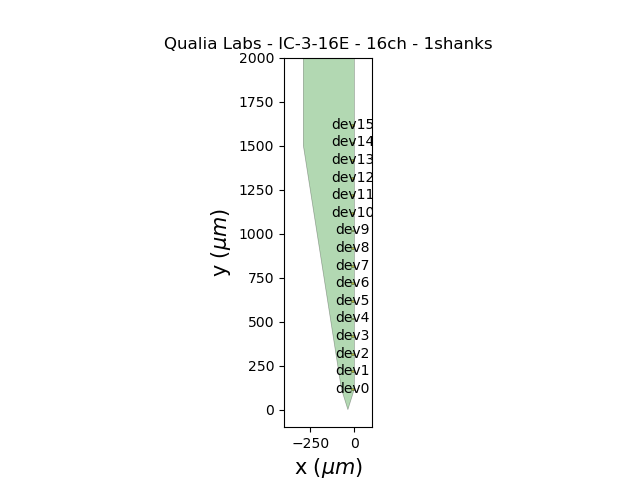

In [27]:
fig, ax = plt.subplots()
plot_probe(probe, with_channel_index=False,with_device_index=True,ax=ax)
ax.set_xlim(-400, 100)
ax.set_ylim(-100, 2000)

In [28]:
recording_prb = recording2.set_probe(probe, group_mode='by_probe',in_place=False)
recording_prb

BinaryFolderRecording: 16 channels - 1 segments - 20.0kHz - 183.000s

In [29]:
probe_rec = recording_prb.get_probe()
probe_rec.to_dataframe(complete=True).loc[:, ["contact_ids", "shank_ids", "device_channel_indices"]]

,contact_ids,shank_ids,device_channel_indices
0,,,0
1,,,1
2,,,2
3,,,3
4,,,4
5,,,5
6,,,6
7,,,7
8,,,8
9,,,9


In [30]:
print(f'Channels after loading the probe file: \n{recording_prb.get_channel_ids()}')
print(f'Channel groups after loading the probe file: \n{recording_prb.get_channel_groups()}')

Channels after loading the probe file: 
['0' '1' '2' '3' '4' '5' '6' '7' '8' '9' '10' '11' '12' '13' '14' '15']
Channel groups after loading the probe file: 
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [31]:
w_ts = sw.plot_timeseries(recording_prb, order_channel_by_depth=True, backend="ipywidgets",
                          clim=(-1000, 1000))

AppLayout(children=(VBox(children=(FloatSlider(value=0.0, continuous_update=False, description='time:', layout…

Add property and annotation to the data. (Not required)

In [32]:
print("Properties before loading the probe:", list(recording2.get_property_keys()))

Properties before loading the probe: ['gain_to_uV', 'offset_to_uV', 'channel_name']


In [33]:
print("Properties after loading the probe:", list(recording_prb.get_property_keys()))

Properties after loading the probe: ['gain_to_uV', 'offset_to_uV', 'channel_name', 'contact_vector', 'location', 'group']


In [34]:
recording_prb.annotate(description="Dataset for SpikeInterface 0.95 EDF tutorial")

In [35]:
print(recording_prb.get_annotation_keys())

['is_filtered', 'probe_0_planar_contour', 'description']


# 2. Preprocessing

We use a new variable to store the preprocessed data.

In [36]:
recording_to_process=recording_prb
recording_to_process.get_num_channels()

16

In [37]:
recording_f = spre.bandpass_filter(recording_to_process, freq_min=300, freq_max=6000)

Apply Common Median Reference (CMR)

In [38]:
recording_cmr = spre.common_reference(recording_f, reference='global', operator='median')

In [39]:
w = sw.plot_timeseries({"raw": recording_to_process, "filt": recording_f, "common": recording_cmr},
                        clim=(-1000, 1000), order_channel_by_depth=True,
                        backend="ipywidgets")

AppLayout(children=(VBox(children=(FloatSlider(value=0.0, continuous_update=False, description='time:', layout…

In [40]:
fs = recording_cmr.get_sampling_frequency()
fs

20000.0

## Run data using part of it.

In [41]:
recording_sub=recording_cmr.frame_slice(start_frame=0*fs, end_frame=150*fs) # use 150 sec
recording_sub

FrameSliceRecording: 16 channels - 1 segments - 20.0kHz - 150.000s

# 3. Spike sorting

In [45]:
ss.installed_sorters()

RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscript6c22yrpn\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptvjczwj1o\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptvjm4_wir\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptvj1vhxy_\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptnggcxs7n\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptgzlb1qvc\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscript9nv1d88_\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscript89j5192p\script.bat


['herdingspikes',
 'klusta',
 'spykingcircus',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2']

In [ ]:
ss.get_default_sorter_params('tridesclous')

In [ ]:
ss.get_sorter_params_description('tridesclous')

In [ ]:
#ss.run_sorter?

In [ ]:
#ss.run_tridesclous?

In [ ]:
# run spike sorting on 150s recording (recording_sub)
sorting_TDC = ss.run_sorter('tridesclous', recording_sub, 
                            output_folder=base_folder / 'results_TDC1', 
                            verbose=True)

In [ ]:
sorting_TDC

In [ ]:
print('Found', len(sorting_TDC.get_unit_ids()), 'units')

Use another sorter

In [ ]:
#pip list

In [ ]:
ss.get_default_sorter_params('spykingcircus')

In [ ]:
ss.get_sorter_params_description('spykingcircus')

In [ ]:
#pip install Cython h5py tqdm

In [ ]:
#pip install mountainsort4

In [ ]:
#pip install pyproject-toml

In [ ]:
#pip install herdingspikes 

In [ ]:
#pip install click klusta klustakwik2

sorting_TDC2 = ss.run_sorter('spykingcircus', recording_sub, 
                             output_folder=base_folder/'results_TDC22', 
                             verbose=True)

sorting_TDC3 = ss.run_sorter('klusta', recording_sub, 
                             output_folder=base_folder/'results_TDC23', 
                             verbose=True)

sorting_TDC4 = ss.run_sorter('herdingspikes', recording_sub, 
                             output_folder=base_folder/'results_TDC24', 
                             verbose=True)

In [ ]:
# every time I run the herdingspikes, the kernel failed.

Use spike sorting method based on Matlab. Clone the sorter repo and point it to SpikeInterface:

In [46]:
!git clone https://github.com/flatironinstitute/ironclust

fatal: destination path 'ironclust' already exists and is not an empty directory.


In [47]:
ss.IronClustSorter.set_ironclust_path('./ironclust')

Setting IRONCLUST_PATH environment variable for subprocess calls to: C:\Users\betty\Desktop\SpikeInterface\EDF\ironclust


In [48]:
ss.IronClustSorter.ironclust_path

'C:\\Users\\betty\\Desktop\\SpikeInterface\\EDF\\ironclust'

In [49]:
ss.installed_sorters()

RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptmsogcumz\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptj41jmdm9\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscript8v686hfa\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptgacauvwe\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptw5h1buoe\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscript22gx_khb\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscript2bdev_rg\script.bat
RUNNING SHELL SCRIPT: C:\Users\betty\AppData\Local\Temp\tmp_shellscriptw6gunm0z\script.bat


['herdingspikes',
 'ironclust',
 'klusta',
 'spykingcircus',
 'spykingcircus2',
 'tridesclous',
 'tridesclous2']

In [1]:
import docker

In [42]:
# run spike sorting by group
sorting_IC = ss.run_sorter('ironclust', recording_sub, 
                           output_folder=base_folder/'results_IC',
                           docker_image=True, verbose=True)


ironclust supports GPU, but no GPU is available.
Running the sorter without GPU
Docker: pulling image spikeinterface/ironclust-compiled-base
Starting container
Installing spikeinterface==0.95.1 in spikeinterface/ironclust-compiled-base
Running ironclust sorter inside spikeinterface/ironclust-compiled-base
Stopping container


SpikeSortingError: Spike sorting in docker failed with the following error:
b'\rwrite_binary_recording:   0%|          | 0/150 [00:00<?, ?it/s]\rwrite_binary_recording:   1%|          | 1/150 [00:00<00:17,  8.43it/s]\rwrite_binary_recording:   2%|2         | 3/150 [00:00<00:16,  8.93it/s]\rwrite_binary_recording:   3%|3         | 5/150 [00:00<00:15,  9.35it/s]\rwrite_binary_recording:   5%|4         | 7/150 [00:00<00:14,  9.68it/s]\rwrite_binary_recording:   6%|6         | 9/150 [00:00<00:14, 10.01it/s]\rwrite_binary_recording:   7%|7         | 11/150 [00:01<00:13, 10.10it/s]\rwrite_binary_recording:   8%|8         | 12/150 [00:01<00:16,  8.34it/s]\rwrite_binary_recording:   9%|9         | 14/150 [00:01<00:15,  8.97it/s]\rwrite_binary_recording:  10%|#         | 15/150 [00:01<00:14,  9.26it/s]\rwrite_binary_recording:  11%|#         | 16/150 [00:01<00:14,  9.31it/s]\rwrite_binary_recording:  11%|#1        | 17/150 [00:01<00:14,  9.04it/s]\rwrite_binary_recording:  13%|#2        | 19/150 [00:01<00:13,  9.89it/s]\rwrite_binary_recording:  14%|#4        | 21/150 [00:02<00:12, 10.25it/s]\rwrite_binary_recording:  15%|#5        | 23/150 [00:02<00:11, 11.05it/s]\rwrite_binary_recording:  17%|#6        | 25/150 [00:02<00:10, 11.78it/s]\rwrite_binary_recording:  18%|#8        | 27/150 [00:02<00:09, 12.53it/s]\rwrite_binary_recording:  19%|#9        | 29/150 [00:02<00:09, 12.89it/s]\rwrite_binary_recording:  21%|##        | 31/150 [00:02<00:09, 12.76it/s]\rwrite_binary_recording:  22%|##2       | 33/150 [00:02<00:09, 13.00it/s]\rwrite_binary_recording:  23%|##3       | 35/150 [00:03<00:08, 13.43it/s]\rwrite_binary_recording:  25%|##4       | 37/150 [00:03<00:08, 13.42it/s]\rwrite_binary_recording:  26%|##6       | 39/150 [00:03<00:08, 13.28it/s]\rwrite_binary_recording:  27%|##7       | 41/150 [00:03<00:09, 11.42it/s]\rwrite_binary_recording:  29%|##8       | 43/150 [00:03<00:08, 11.93it/s]\rwrite_binary_recording:  30%|###       | 45/150 [00:03<00:08, 11.70it/s]\rwrite_binary_recording:  31%|###1      | 47/150 [00:04<00:08, 11.77it/s]\rwrite_binary_recording:  33%|###2      | 49/150 [00:04<00:08, 12.05it/s]\rwrite_binary_recording:  34%|###4      | 51/150 [00:04<00:08, 12.05it/s]\rwrite_binary_recording:  35%|###5      | 53/150 [00:04<00:07, 12.26it/s]\rwrite_binary_recording:  37%|###6      | 55/150 [00:04<00:07, 12.48it/s]\rwrite_binary_recording:  38%|###8      | 57/150 [00:04<00:07, 12.44it/s]\rwrite_binary_recording:  39%|###9      | 59/150 [00:05<00:07, 12.57it/s]\rwrite_binary_recording:  41%|####      | 61/150 [00:05<00:07, 12.37it/s]\rwrite_binary_recording:  42%|####2     | 63/150 [00:05<00:07, 11.90it/s]\rwrite_binary_recording:  43%|####3     | 65/150 [00:05<00:07, 12.00it/s]\rwrite_binary_recording:  45%|####4     | 67/150 [00:05<00:07, 11.69it/s]\rwrite_binary_recording:  46%|####6     | 69/150 [00:05<00:07, 11.49it/s]\rwrite_binary_recording:  47%|####7     | 71/150 [00:06<00:07, 11.23it/s]\rwrite_binary_recording:  49%|####8     | 73/150 [00:06<00:06, 11.10it/s]\rwrite_binary_recording:  50%|#####     | 75/150 [00:06<00:06, 11.01it/s]\rwrite_binary_recording:  51%|#####1    | 77/150 [00:06<00:06, 10.89it/s]\rwrite_binary_recording:  53%|#####2    | 79/150 [00:06<00:06, 10.65it/s]\rwrite_binary_recording:  54%|#####4    | 81/150 [00:07<00:06, 10.69it/s]\rwrite_binary_recording:  55%|#####5    | 83/150 [00:07<00:06, 10.33it/s]\rwrite_binary_recording:  57%|#####6    | 85/150 [00:07<00:06, 10.38it/s]\rwrite_binary_recording:  58%|#####8    | 87/150 [00:07<00:05, 10.52it/s]\rwrite_binary_recording:  59%|#####9    | 89/150 [00:07<00:05, 10.49it/s]\rwrite_binary_recording:  61%|######    | 91/150 [00:08<00:05, 11.26it/s]\rwrite_binary_recording:  62%|######2   | 93/150 [00:08<00:04, 11.88it/s]\rwrite_binary_recording:  63%|######3   | 95/150 [00:08<00:04, 12.58it/s]\rwrite_binary_recording:  65%|######4   | 97/150 [00:08<00:04, 12.88it/s]\rwrite_binary_recording:  66%|######6   | 99/150 [00:08<00:03, 13.20it/s]\rwrite_binary_recording:  67%|######7   | 101/150 [00:08<00:03, 13.39it/s]\rwrite_binary_recording:  69%|######8   | 103/150 [00:08<00:03, 13.64it/s]\rwrite_binary_recording:  70%|#######   | 105/150 [00:09<00:03, 13.69it/s]\rwrite_binary_recording:  71%|#######1  | 107/150 [00:09<00:03, 13.76it/s]\rwrite_binary_recording:  73%|#######2  | 109/150 [00:09<00:02, 13.97it/s]\rwrite_binary_recording:  74%|#######4  | 111/150 [00:09<00:02, 14.15it/s]\rwrite_binary_recording:  75%|#######5  | 113/150 [00:09<00:02, 13.93it/s]\rwrite_binary_recording:  77%|#######6  | 115/150 [00:09<00:02, 14.04it/s]\rwrite_binary_recording:  78%|#######8  | 117/150 [00:09<00:02, 14.00it/s]\rwrite_binary_recording:  79%|#######9  | 119/150 [00:10<00:02, 13.90it/s]\rwrite_binary_recording:  81%|########  | 121/150 [00:10<00:02, 14.02it/s]\rwrite_binary_recording:  82%|########2 | 123/150 [00:10<00:03,  6.84it/s]\rwrite_binary_recording:  83%|########3 | 125/150 [00:12<00:09,  2.75it/s]\rwrite_binary_recording:  85%|########4 | 127/150 [00:12<00:06,  3.54it/s]\rwrite_binary_recording:  86%|########6 | 129/150 [00:12<00:04,  4.54it/s]\rwrite_binary_recording:  87%|########7 | 131/150 [00:13<00:03,  5.64it/s]\rwrite_binary_recording:  89%|########8 | 133/150 [00:13<00:02,  6.75it/s]\rwrite_binary_recording:  90%|######### | 135/150 [00:13<00:01,  7.79it/s]\rwrite_binary_recording:  91%|#########1| 137/150 [00:13<00:01,  8.94it/s]\rwrite_binary_recording:  93%|#########2| 139/150 [00:13<00:01, 10.05it/s]\rwrite_binary_recording:  94%|#########3| 141/150 [00:13<00:00, 10.75it/s]\rwrite_binary_recording:  95%|#########5| 143/150 [00:13<00:00, 11.47it/s]\rwrite_binary_recording:  97%|#########6| 145/150 [00:14<00:00, 12.08it/s]\rwrite_binary_recording:  98%|#########8| 147/150 [00:14<00:00, 12.56it/s]\rwrite_binary_recording:  99%|#########9| 149/150 [00:14<00:00, 12.90it/s]\rwrite_binary_recording: 100%|##########| 150/150 [00:14<00:00, 10.38it/s]\nRUNNING SHELL SCRIPT: /tmp/tmp_shellscript7_aapou3/script.sh\nWarning! The recording is already filtered, but ironclust filter is enabled\nchannels = 16, timepoints = 3000000, duration = 2.5 minutes\nCreating argfile.txt...\nRUNNING SHELL SCRIPT: /tmp/tmp_shellscriptpbicgg53/script.sh\nRunning ironclust in /Users/betty/Desktop/SpikeInterface/EDF/results_IC/tmp...\nRUNNING SHELL SCRIPT: /tmp/tmp_shellscriptepif2u_u/script.sh\nRUNNING SHELL SCRIPT: /Users/betty/Desktop/SpikeInterface/EDF/results_IC/run_ironclust.sh\n===================================================\n\nIronClust Version: 2\n\n===================================================\n\nRemoved 0 lock(s).\n\nRunning irc2.m (5.9.8)\n\nCreated /Users/betty/Desktop/SpikeInterface/EDF/results_IC/tmp/raw_geom.prm\n\nRead /Users/betty/Desktop/SpikeInterface/EDF/results_IC/ironclust_dataset/raw.mda (1/1), took 11.8s (8.2 MB/s, 96.0 MB)\n\n\tget_prinvec_: took 0.1s\n\nArrays have incompatible sizes for this operation.\n\nError using +\n\nArrays have incompatible sizes for this operation.\n\n\n\nError in irc2>find_site2_spk_ (line 9450)\n\n\n\nError in irc2>get_spikes_ (line 4718)\n\n\n\nError in irc2>detect_paged_ (line 4664)\n\n\n\nError in irc2>detect_ (line 4358)\n\n\n\nError in irc2>detect_cache_ (line 340)\n\n\n\nError in irc2 (line 236)\n\n\n\nError in p_ironclust (line 22)\n\n\n\nMATLAB:sizeDimensionsMustMatch\n\nError running ironclust\nTraceback (most recent call last):\n  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/basesorter.py", line 225, in run_from_folder\n    SorterClass._run_from_folder(output_folder, sorter_params, verbose)\n  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/ironclust/ironclust.py", line 249, in _run_from_folder\n    raise Exception(\'ironclust returned a non-zero exit code\')\nException: ironclust returned a non-zero exit code\n\nTraceback (most recent call last):\n  File "/Users/betty/Desktop/SpikeInterface/EDF/in_container_sorter_script.py", line 17, in <module>\n    sorting = run_sorter_local(\n  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/runsorter.py", line 162, in run_sorter_local\n    SorterClass.run_from_folder(output_folder, raise_error, verbose)\n  File "/home/miniconda3/lib/python3.8/site-packages/spikeinterface/sorters/basesorter.py", line 261, in run_from_folder\n    raise SpikeSortingError(\nspikeinterface.sorters.utils.misc.SpikeSortingError: Spike sorting failed. You can inspect the runtime trace in /Users/betty/Desktop/SpikeInterface/EDF/results_IC/spikeinterface_log.json\n'

In [ ]:
sorting_IC

In [ ]:
print(f'IronClust found {len(sorting_IC.get_unit_ids())} units')

In [ ]:
print(f'IronClust unit ids: {sorting_IC.get_unit_ids()}')

In [ ]:
print(f'Spike train of a unit: {sorting_IC.get_unit_spike_train(1)}')

In [ ]:
w_rs = sw.plot_rasters(sorting_IC)